In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pathEdge_length = pd.read_csv('/home/zarin/Desktop/Results/4usu_walmartNorth/last_shortest_path_length.csv')
pathEdge_length = pathEdge_length[['simple_model_e', 'travel_time', 'length']]

pathEdge_time = pd.read_csv('/home/zarin/Desktop/Results/4usu_walmartNorth/last_shortest_path_time.csv')
pathEdge_time = pathEdge_time[['simple_model_e', 'travel_time', 'length']]

pathEdge_energy = pd.read_csv('/home/zarin/Desktop/Results/4usu_walmartNorth/last_shortest_path_energy.csv')
pathEdge_energy = pathEdge_energy[['simple_model_e', 'travel_time', 'length']]

In [3]:
length = pathEdge_length[['simple_model_e', 'travel_time', 'length']].copy()
length = length.sum(axis=0) 

column_names = ["Energy", "Time", "Distance"]
length_df = pd.DataFrame(columns = column_names)
length_df.to_csv('/home/zarin/Desktop/Route_Prediction/pathEdgeSumLength.csv')
length_df.loc[len(length_df)] = length.values
length_df = length_df.drop_duplicates()
length_df

,Energy,Time,Distance
0,3.307998e+07,1267.0,17082.235


In [4]:
time = pathEdge_time[['simple_model_e', 'travel_time', 'length']].copy()
time = time.sum(axis=0) 

column_names = ["Energy", "Time", "Distance"]
time_df = pd.DataFrame(columns = column_names)
time_df.to_csv('/home/zarin/Desktop/Route_Prediction/pathEdgeSumTime.csv')
time_df.loc[len(time_df)] = time.values
time_df = time_df.drop_duplicates()
time_df

,Energy,Time,Distance
0,4.748030e+07,1301.1,20268.661


In [5]:
energy = pathEdge_energy[['simple_model_e', 'travel_time', 'length']].copy()
energy = energy.sum(axis=0) 

column_names = ["Energy", "Time", "Distance"]
energy_df = pd.DataFrame(columns = column_names)
energy_df.to_csv('/home/zarin/Desktop/Route_Prediction/pathEdgeSumEnergy.csv')
energy_df.loc[len(energy_df)] = energy.values
energy_df = energy_df.drop_duplicates()
energy_df

,Energy,Time,Distance
0,3.185422e+07,1307.4,17104.242


In [6]:
column_names = ["Energy", "Time", "Distance"]
combined_DF = pd.DataFrame(columns = column_names)
data = ['Energy-efficient', 'Time-efficient', 'Distance-efficient']
combined_DF.insert(loc=0, column=' ', value=data)

combined_DF.loc[0, 'Energy'] = list(energy_df['Energy'].values)[0]
combined_DF.loc[0, 'Time'] = list(energy_df['Time'].values)[0]
combined_DF.loc[0, 'Distance'] = list(energy_df['Distance'].values)[0]

combined_DF.loc[1, 'Energy'] = list(time_df['Energy'].values)[0]
combined_DF.loc[1, 'Time'] = list(time_df['Time'].values)[0]
combined_DF.loc[1, 'Distance'] = list(time_df['Distance'].values)[0]

combined_DF.loc[2, 'Energy'] = list(length_df['Energy'].values)[0]
combined_DF.loc[2, 'Time'] = list(length_df['Time'].values)[0]
combined_DF.loc[2, 'Distance'] = list(length_df['Distance'].values)[0]

combined_DF

,,Energy,Time,Distance
0,Energy-efficient,31854219.215049,1307.4,17104.242
1,Time-efficient,47480304.161072,1301.1,20268.661
2,Distance-efficient,33079978.564328,1267.0,17082.235


**2D**

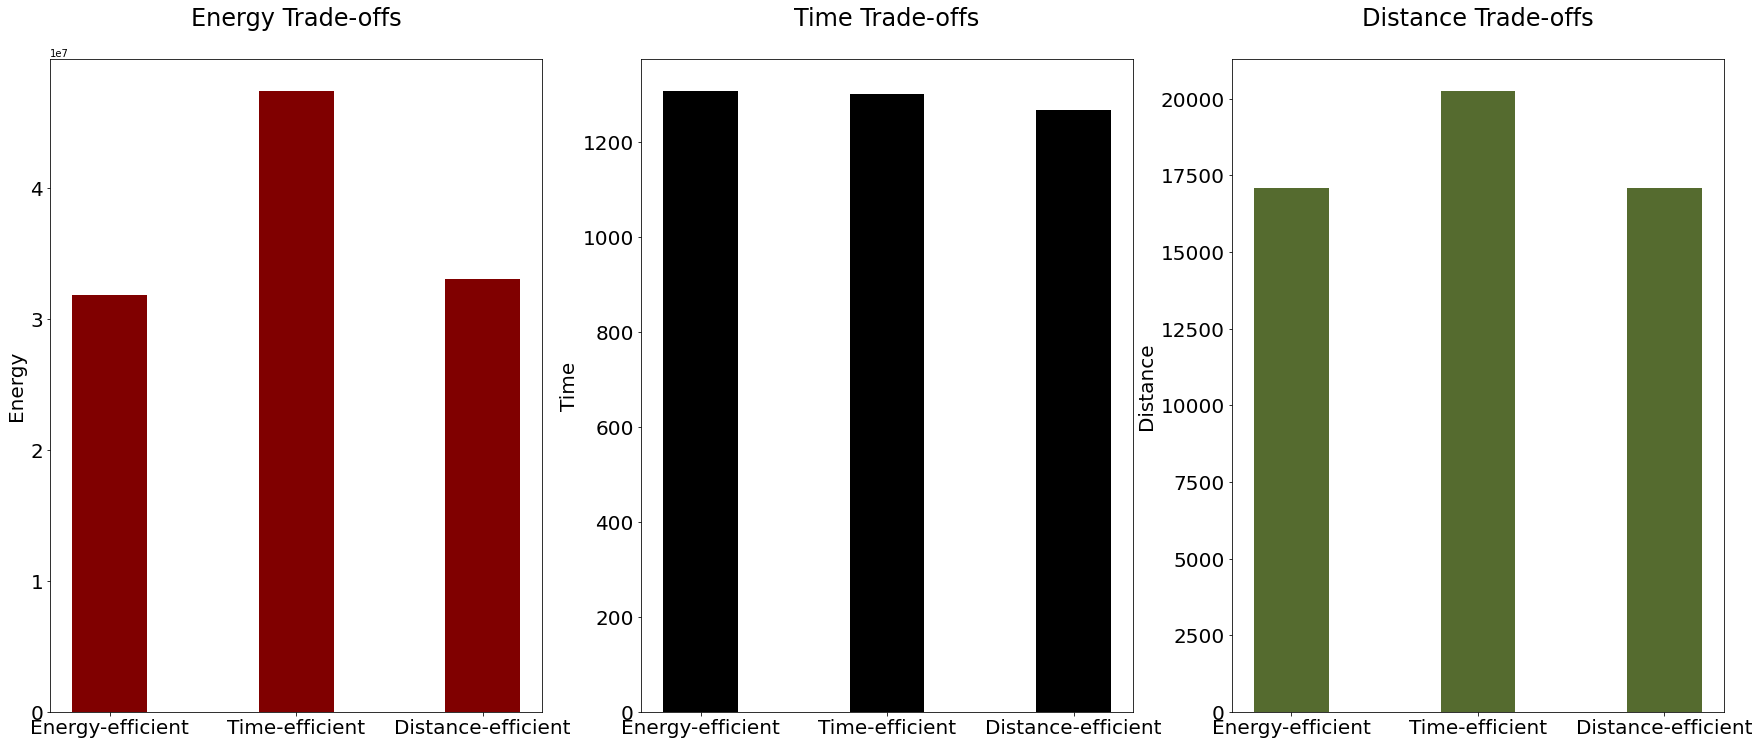

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(30, 12))
plt.rcParams.update({'font.size': 20})

plt.subplot(1, 3, 1)
plt.bar(combined_DF[' '], combined_DF['Energy'], color ='maroon', width = 0.4)
plt.title('Energy Trade-offs\n')
plt.ylabel('Energy', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 3, 2)
plt.bar(combined_DF[' '], combined_DF['Time'], color ='black', width = 0.4)
plt.title('Time Trade-offs\n')
plt.ylabel('Time', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 3, 3)
plt.bar(combined_DF[' '], combined_DF['Distance'], color ='darkolivegreen', width = 0.4)
plt.title('Distance Trade-offs\n')
plt.ylabel('Distance', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()